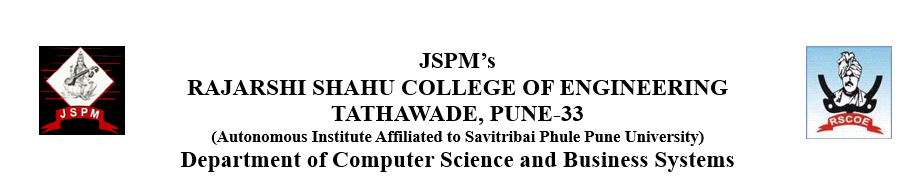

### Name: Bhargavi Satish Bhende

### PRN No.: RBT21CB053



# Problem statement:
Implementation of clustering techniques a)K-means b)Hierachical Clustering c) DBSCAN d) Expectation maximization

### Introduction:

Clustering is an unsupervised machine learning technique that involves grouping similar data points into clusters. It is widely used for pattern recognition, anomaly detection, and exploratory data analysis. In this practical, we will apply clustering algorithms to the Iris dataset, which consists of measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_std = StandardScaler().fit_transform(X)




1. **K-Means Clustering:**
   - K-means is a partitioning method that aims to divide the dataset into 'k' distinct, non-overlapping subsets (clusters).
   - It minimizes the sum of squared distances between data points and the centroid of their respective clusters.
   - The algorithm iteratively assigns data points to the nearest centroid and updates the centroids until convergence.




In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. **Hierarchical Clustering:**
   - Hierarchical clustering builds a tree-like hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down).
   - Agglomerative clustering starts with individual data points as clusters and merges them iteratively based on a distance metric.
   - Divisive clustering begins with all data points in one cluster and splits them based on a distance metric.


In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_std)



3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
   - DBSCAN identifies clusters based on the density of data points. It can find clusters of arbitrary shapes.
   - It classifies each data point as a core point, a border point, or an outlier based on its density.
   - Clusters are formed by connecting core points that are close enough.


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)



4. **Expectation Maximization (EM) Algorithm using Gaussian Mixture Models (GMM):**
   - GMM assumes that the data is generated by a mixture of several Gaussian distributions.
   - EM is used to estimate the parameters of the Gaussian distributions, such as means and covariances.
   - Each data point has a probability of belonging to each cluster, and the algorithm iteratively refines these probabilities.

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_std)


###  Silhouette score:

 Silhouette score ranges from -1 to 1, with higher values indicating better-defined clusters. The function 'print_silhouette_score' takes the predicted labels from different clustering algorithms ('kmeans_labels', 'hierarchical_labels', 'dbscan_labels', and 'gmm_labels') and their corresponding method names. It calculates the silhouette score for each clustering result based on the standardized feature matrix ('X_std') and prints the scores for comparison. The goal is to assess the cohesion within clusters and separation between clusters, helping to evaluate the effectiveness of each clustering algorithm.

In [ ]:
def print_silhouette_score(labels, method):
    silhouette_avg = silhouette_score(X_std, labels)
    print(f"Silhouette Score ({method}): {silhouette_avg:.4f}")

print_silhouette_score(kmeans_labels, 'KMeans')
print_silhouette_score(hierarchical_labels, 'Hierarchical Clustering')
print_silhouette_score(dbscan_labels, 'DBSCAN')
print_silhouette_score(gmm_labels, 'Gaussian Mixture Model')


Silhouette Score (KMeans): 0.4599
Silhouette Score (Hierarchical Clustering): 0.4467
Silhouette Score (DBSCAN): 0.3565
Silhouette Score (Gaussian Mixture Model): 0.3742


## Visualization

In [ ]:
def plot_clusters(labels, method):
    plt.scatter(X_std[:, 0], X_std[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'Clustering Result ({method})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()



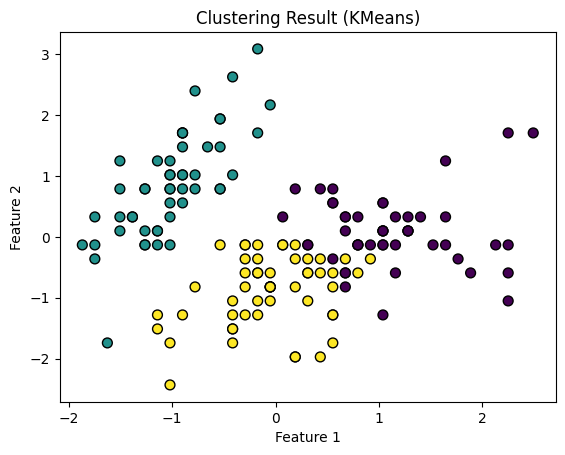

In [ ]:
plot_clusters(kmeans_labels, 'KMeans')


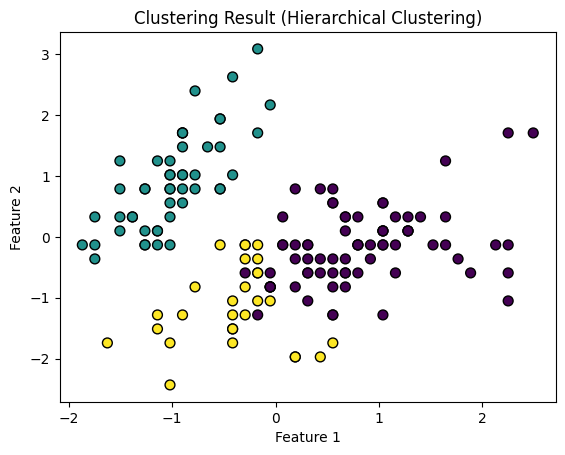

In [ ]:
plot_clusters(hierarchical_labels, 'Hierarchical Clustering')


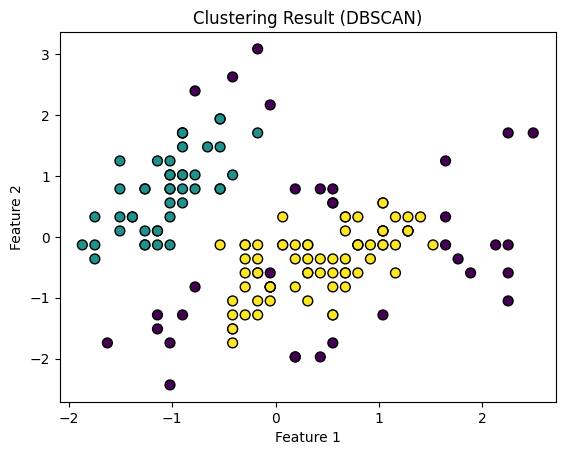

In [ ]:
plot_clusters(dbscan_labels, 'DBSCAN')


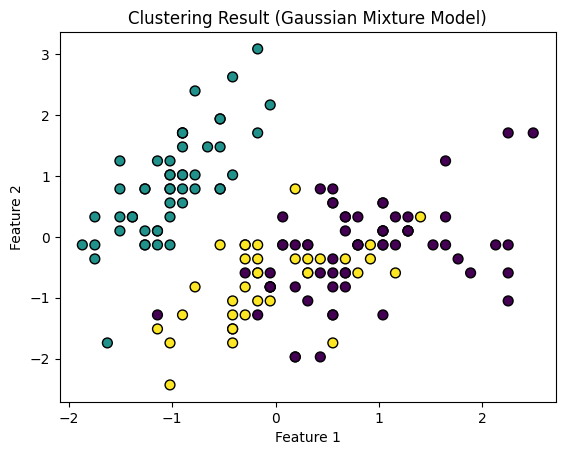

In [ ]:
plot_clusters(gmm_labels, 'Gaussian Mixture Model')

# **Conclusion:**

Among the clustering algorithms evaluated, KMeans and Hierarchical Clustering achieved higher silhouette scores (0.4599 and 0.4467, respectively), indicating well-defined clusters. DBSCAN and Gaussian Mixture Model (GMM) performed reasonably well with scores of 0.3565 and 0.3742. The choice of the optimal algorithm depends on the dataset's characteristics, with KMeans and Hierarchical Clustering being suitable for clearly defined clusters, while DBSCAN and GMM may be preferred for datasets with irregular shapes or varying densities. Careful consideration of algorithm assumptions and computational complexity is crucial in selecting the most appropriate clustering approach.